## Importing Data 

In [1]:
import os
print("Current_Working_Directory:", os.getcwd())

Current_Working_Directory: C:\Users\viraj\Code_a\Machine_learning\Automate Data Cleaning with Python


In [2]:
directory_path = "C:/Users/viraj/Code_a/Machine_learning/Automate Data Cleaning with Python"
contents = os.listdir(directory_path)
print("Contents")
for i in contents:
    print(i)

Contents
.ipynb_checkpoints
Automate.ipynb
car.c45-names
car.data
car.names
data.csv
data.xlsx
data1.csv


In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [4]:
adult = fetch_ucirepo(id=2)

In [5]:
import pandas as pd
import numpy as np

In [6]:
adult

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

In [7]:
# Extracting the relevant data
features_data = adult['data']['features']
#[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week'   ,'native-country']]
                                                 
targets_data = adult['data']['targets']

# Merging features and targets data
data = pd.concat([features_data, targets_data], axis=1)

In [8]:
data.to_csv('data1.csv', index=False) #for an example lets first store the data in a csv and and then checkout our function

## Data Format

When automating a data pipeline, it's crucial to efficiently handle various data formats such as JSON, CSV, or XML. Identifying the format of incoming data becomes a crucial step in the process. One way to streamline this is by leveraging Python's `os` library to automatically detect the format using file extensions.

By doing this, we can create a function that scans the file path, recognizes the extension, and then directs the data to the appropriate parser for further processing. This automation eliminates the need for manual intervention in determining the format and selecting the corresponding parser. As a result, the data pipeline becomes more robust and efficient, allowing for smoother data cleaning and transformation tasks.

In [9]:
def read_data(file_path):
    _,file_ext = os.path.splitext(file_path)
    if file_ext == '.csv':
        return pd.read_csv(file_path)
    elif file_ext == '.json':
        return pd.read_json(file_path)
    elif file_ext in ['.xls', '.xlsx']:
        return pd.read_excel(file_path)
    elif file_ext == '.data':
        # Assuming comma-separated values with no header
        return pd.read_csv(file_path, header=None)
    else:
        raise ValueError("Unknown file format")

In [10]:
file_path=("C:/Users/viraj/Code_a/Machine_learning/Automate Data Cleaning with Python/data1.csv")

In [11]:
data = read_data(file_path)

##  Handle Duplicates

When we automate the handling of duplicates in a data pipeline, we're essentially ensuring that our data is clean and consistent throughout its journey. Imagine we're organizing a stack of papers - if we have duplicates, it's like having multiple copies of the same document cluttering your workspace. By automating the removal of these duplicates, we're effectively tidying up our data, making sure each piece of information is unique and valuable. This not only saves our time and effort but also helps in avoiding mistakes that could arise from analyzing duplicate data. 

So, automating this process streamlines our workflow, allowing us to focus on extracting meaningful insights from our data without worrying about redundant information. It's like having a helpful assistant who takes care of the tedious task of decluttering our data, leaving us with a clean and organized dataset to work with.

In [12]:
def handle_duplicates(df):
    # Detect duplicates
    duplicates = df.duplicated(keep='first')
    
    # If duplicates exist, remove them and return cleaned DataFrame
    if duplicates.any():
        print("Duplicate rows:")
        print(df[duplicates])     
        df_cleaned = df.drop_duplicates(keep='first').copy()  # Keep only the first occurrence of each duplicate
        num_duplicates = duplicates.sum()
        print(f"\nRemoved {num_duplicates} duplicate rows.")
        return df_cleaned
    else:
        print("No duplicates found.")
        return df

In [13]:
cleaned_data = handle_duplicates(data)

Duplicate rows:
       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44        

In [14]:
cleaned_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Missing Values

When dealing with missing data in our pipeline, we have a few options to consider. We can either remove observations containing missing values or fill in these gaps using techniques like forward fill, backward fill, or substituting with the mean or median of the column. Pandas provides convenient methods like `.fillna()` and `.dropna()` to handle these scenarios effectively.

The decision on how to handle missing values depends on a couple of factors. Firstly, it depends on the type of values that are missing and secondly, on the proportion of missing values relative to the total number of records we have. Dealing with missing values is a critical task in data processing and can significantly impact the integrity of our analyses.

In our pipeline, we follow a structured approach. First, we check the total number of rows with null values. If this accounts for only 5% or less of the total records, we opt to simply remove these affected rows. However, if more rows have missing values, we assess each column individually. For columns with missing values, we either impute the median of the value or generate a warning for further investigation.

This process involves a hybrid human validation approach. We recognize that dealing with missing values requires careful consideration and cannot be overlooked in ensuring the accuracy and reliability of our data analysis.

In [15]:
cleaned_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [16]:
cleaned_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
def count_unique_elements(df):
    unique_counts = {}
    for column in df.columns:
        unique_counts[column] = df[column].value_counts()
    return unique_counts

In [18]:
unique_counts = count_unique_elements(cleaned_data)
# Print the count of each unique element for each column
for column, counts in unique_counts.items():
    print(f"Column '{column}':")
    print(counts)
    print()

Column 'age':
age
36    1348
35    1336
33    1335
23    1328
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

Column 'workclass':
workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Column 'fnlwgt':
fnlwgt
203488    21
190290    19
120277    19
126569    18
125892    18
          ..
119913     1
78170      1
279721     1
390867     1
350977     1
Name: count, Length: 28523, dtype: int64

Column 'education':
education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6t

In [19]:
cleaned_data[cleaned_data == '?'] = np.nan
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       46014 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      46004 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  47957 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [20]:
# count the Uniques elements
def count_unique_elements(df):
    unique_counts = {}
    for column in df.columns:
        unique_counts[column] = df[column].nunique()
    return unique_counts

unique_counts = count_unique_elements(cleaned_data)

#print unique elements for each cloumn
for column, count in unique_counts.items():
    print(f"Column '{column}': {count} unique elements")

Column 'age': 74 unique elements
Column 'workclass': 8 unique elements
Column 'fnlwgt': 28523 unique elements
Column 'education': 16 unique elements
Column 'education-num': 16 unique elements
Column 'marital-status': 7 unique elements
Column 'occupation': 14 unique elements
Column 'relationship': 6 unique elements
Column 'race': 5 unique elements
Column 'sex': 2 unique elements
Column 'capital-gain': 123 unique elements
Column 'capital-loss': 99 unique elements
Column 'hours-per-week': 96 unique elements
Column 'native-country': 41 unique elements
Column 'income': 4 unique elements


In [21]:
def detect_missing_values(df):
    # Calculate total number of rows
    total_rows = len(df)

    # Calculate number and proportion of missing values for each column
    missing_values_info = {}
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        missing_proportion = missing_count / total_rows
        missing_values_info[col] = {'count': missing_count, 'proportion': missing_proportion}
    
    # Print missing values info for each column
    for col, info in missing_values_info.items():
        print(f"Column '{col}': {info['count']} missing values, {info['proportion']:.2%} proportion")

In [22]:
# Run the functions on cleaned_data
pt = detect_missing_values(cleaned_data)

Column 'age': 0 missing values, 0.00% proportion
Column 'workclass': 2799 missing values, 5.73% proportion
Column 'fnlwgt': 0 missing values, 0.00% proportion
Column 'education': 0 missing values, 0.00% proportion
Column 'education-num': 0 missing values, 0.00% proportion
Column 'marital-status': 0 missing values, 0.00% proportion
Column 'occupation': 2809 missing values, 5.75% proportion
Column 'relationship': 0 missing values, 0.00% proportion
Column 'race': 0 missing values, 0.00% proportion
Column 'sex': 0 missing values, 0.00% proportion
Column 'capital-gain': 0 missing values, 0.00% proportion
Column 'capital-loss': 0 missing values, 0.00% proportion
Column 'hours-per-week': 0 missing values, 0.00% proportion
Column 'native-country': 856 missing values, 1.75% proportion
Column 'income': 0 missing values, 0.00% proportion


In [23]:
# all three columns that have missing value have categorical data thus we can discard the rows if its below 

In [24]:
cleaned_data.dropna(inplace=True)

When handling missing data, the choice of imputation method depends on the nature of the data:

1. For numerical data that is normally distributed or lacks significant outliers, mean imputation is suitable.

2. If the data contains outliers or is skewed, making the mean less representative, median imputation is preferred.

3. Categorical variables with few missing values can be imputed using mode imputation, where the mode (most frequent value) adequately represents the category distribution.

These guidelines help ensure that the imputed values accurately reflect the characteristics of the dataset, improving the reliability of subsequent analyses.

In [25]:
def dealing_missing_data(df):
    # handle the missing values
    values = 100 * (round(df.isnull().sum() / df.count(), 2))
    to_delete = []
    to_impute = []
    to_check = []
    for name, proportion in values.items():
        if int(proportion) == 0:
            continue
        elif int(proportion) <= 10:
            to_impute.append(name)
            df[name].fillna(df[name].median(), inplace=True)  # Impute with median inplace
        else:
            to_check.append(name)
    print(f"\nThe missing values in {to_impute} have been replaced by the median.")
    print(f"The columns {to_check} should be further understood")
    return df


In [26]:
pt = dealing_missing_data(cleaned_data)


The missing values in [] have been replaced by the median.
The columns [] should be further understood


In [27]:
cleaned_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## DETECTING DATA TYPES MISMATCHES

As a data professional, automating the detection of data type mismatches is paramount for ensuring the accuracy and reliability of our analyses. When working with large datasets in a fast-paced environment, manually checking each column for data type inconsistencies is time-consuming and prone to errors.

By automating this process within our data pipeline, we can efficiently identify mismatches between detected and expected data types. This not only saves valuable time but also helps us maintain data integrity by ensuring that each column contains the appropriate data type.

Detecting and addressing data type mismatches early in the pipeline is essential for preventing downstream issues. For example, using numeric operations on columns with string data types can lead to errors or unexpected results in our analyses. By automating this detection process, we can catch these issues early and take corrective actions to ensure the accuracy of our analyses.

Additionally, automating the handling of data type mismatches allows us to maintain consistency and reliability in our data processing workflows. Whether it involves converting data to the correct type, removing mismatched rows, or raising alerts for further investigation, automating these tasks ensures that our data remains clean and consistent throughout the pipeline.

In [28]:
expected_types = {'age': 'int64', 
                  'workclass': 'str', 
                  'fnlwgt': 'int64',
                  'education': 'str', 
                  'education-num': 'int64',
                  'marital-status': 'str', 
                  'occupation': 'str',
                  'relationship': 'str'        ,
                  'race':'str',
                  'sex':'str',
                  'capital-gain':'int64',
                  'capital-loss':'int64',
                  'hours-per-week':'int64',
                  'native-country':'str',
                  'income':'object'
                  }

def check_data_types(df, expected_types):
    """
    Check the data types of a DataFrame against expected types.

    Parameters:
    - df (pd.DataFrame): The DataFrame to check.
    - expected_types (dict): A dictionary mapping column names to expected data types (e.g., 'int', 'float', 'datetime').

    Returns:
    - dict: A report of mismatches and suggested corrections.
    """
    for column, expected_type in expected_types.items():
        actual_type = df[column].dtype

        # Create a readable version of numpy dtype for reporting
        readable_type = np.dtype(actual_type).name
        if not np.issubdtype(actual_type, np.dtype(expected_type).type):
            message = f"Column '{column}' has type '{readable_type}' instead of '{expected_type}'."
            suggestion = f"Convert '{column}' to '{expected_type}'."
            print(f"{message}", f"{suggestion}")

    print("No data types mismatch detected")

In [29]:
dt=check_data_types(cleaned_data,expected_types)

Column 'workclass' has type 'object' instead of 'str'. Convert 'workclass' to 'str'.
Column 'education' has type 'object' instead of 'str'. Convert 'education' to 'str'.
Column 'marital-status' has type 'object' instead of 'str'. Convert 'marital-status' to 'str'.
Column 'occupation' has type 'object' instead of 'str'. Convert 'occupation' to 'str'.
Column 'relationship' has type 'object' instead of 'str'. Convert 'relationship' to 'str'.
Column 'race' has type 'object' instead of 'str'. Convert 'race' to 'str'.
Column 'sex' has type 'object' instead of 'str'. Convert 'sex' to 'str'.
Column 'native-country' has type 'object' instead of 'str'. Convert 'native-country' to 'str'.
No data types mismatch detected


## Detecting Numerical and Categorical Columns

As a data professional, detecting numerical and categorical columns is fundamental to understanding the makeup of our dataset. It's like examining the ingredients of a recipe before cooking - knowing what we're working with helps us plan our approach effectively.

Identifying numerical columns allows us to perform mathematical operations, statistical analyses, and build machine learning models. These columns often represent quantities, measurements, or continuous variables, providing valuable insights into trends and patterns within our data.

On the other hand, recognizing categorical columns informs us about the different categories or groups present in our dataset. These columns might include variables like gender, product types, or geographic regions. Understanding categorical data enables us to conduct segmentation, perform comparisons, and create meaningful visualizations.

By automating the detection of numerical and categorical columns in our data pipeline, we streamline the process of preparing and analyzing data. This automation not only saves time but also ensures consistency and accuracy in our workflows. Ultimately, it empowers us to extract meaningful insights and make informed decisions based on the nuances of our data.

In [30]:
def detect_categorical_columns(df):
    # Select columns with categorical data types (objects, categoricals)
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns

# Example usage:
categorical_columns = detect_categorical_columns(cleaned_data)
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [31]:
def detect_numerical_columns(df):
    # Select columns with numerical data types (integers, floats)
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
    return numerical_columns

# Example usage:
numerical_columns = detect_numerical_columns(cleaned_data)
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Checking whether Data is Normalized

A QQ plot, or quantile-quantile plot, is a graphical tool used to assess whether a given dataset follows a particular probability distribution, such as the normal distribution. Here's a more conversational explanation:

Imagine you have a dataset, and you want to know if it looks like it comes from a specific type of distribution, like the normal distribution. A QQ plot helps you with that. It's like having a visual aid to see if your dataset matches up with what you'd expect from the distribution you're interested in.

Here's how it works: On a QQ plot, you have two axes. One axis represents the quantiles of your dataset, which are essentially points that divide your data into equal-sized groups. The other axis represents the quantiles of the theoretical distribution you're comparing against, like the normal distribution.

If your dataset closely follows the theoretical distribution, the points on the QQ plot will form a straight line. But if there are deviations, the points will deviate from the straight line, indicating that your dataset differs from the expected distribution.


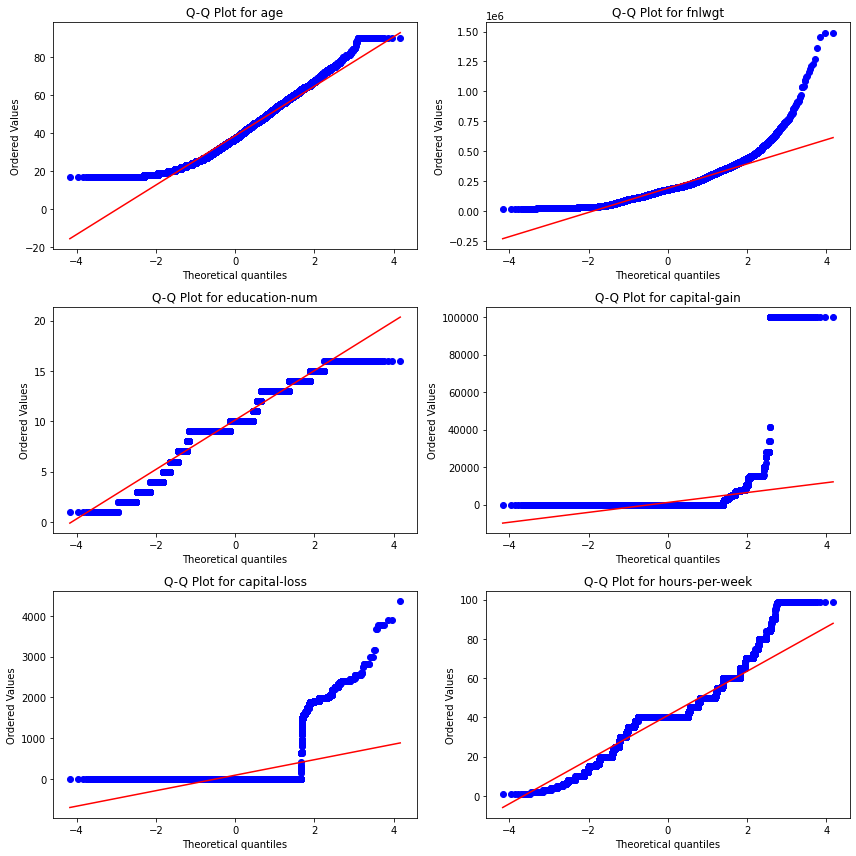

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def qq_plot_integer_columns(df):
    # Get numerical columns that are of integer data type
    int_columns = df.select_dtypes(include=['int']).columns.tolist()

    # Determine the number of rows and columns for subplots
    num_rows = (len(int_columns) + 1) // 2  # Add 1 to round up if odd
    num_cols = min(len(int_columns), 2)  # Limit to 2 columns for readability

    # Create subplots for QQ plots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Flatten axes if there is only one row or one column
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    if num_cols == 1:
        axes = axes.reshape(-1, 1)

    # Plot Q-Q plots for each numerical column
    for i, column in enumerate(int_columns):
        row_index = i // num_cols
        col_index = i % num_cols
        stats.probplot(df[column], dist="norm", plot=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Q-Q Plot for {column}')

    plt.tight_layout()
    plt.show()

# Example usage:
qq_plot_integer_columns(cleaned_data)


As a data professional, ensuring that data is normalized is crucial for maintaining consistency and reliability in our analyses. It's like ensuring that all the ingredients in a recipe are in the right proportions - without normalization, our analyses may be skewed or inaccurate.

Normalizing data involves scaling it to a common range or distribution, which makes comparisons and interpretations more meaningful. This is particularly important when working with features or variables that have different scales or units of measurement. For example, if one variable ranges from 0 to 100 and another from 0 to 100,000, without normalization, the larger variable would dominate the analysis, leading to biased results.

By checking whether data is normalized, we ensure that our analyses are fair and unbiased, allowing us to draw accurate conclusions and make informed decisions. Normalized data also tends to be more conducive to modeling and machine learning algorithms, as it helps mitigate issues such as overfitting and instability.

In [33]:
import matplotlib.pyplot as plt

def plot_histograms(df):
    int_columns = df.select_dtypes(include=['int']).columns.tolist()
    num_cols = len(int_columns)
    num_rows = (num_cols + 1) // 2  # Add 1 to round up if odd

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

    # Flatten axes if there are multiple rows
    if num_rows > 1:
        axes = axes.flatten()

    for i, column in enumerate(int_columns):
        ax = axes[i]
        ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # Hide unused subplots
    for j in range(num_cols, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


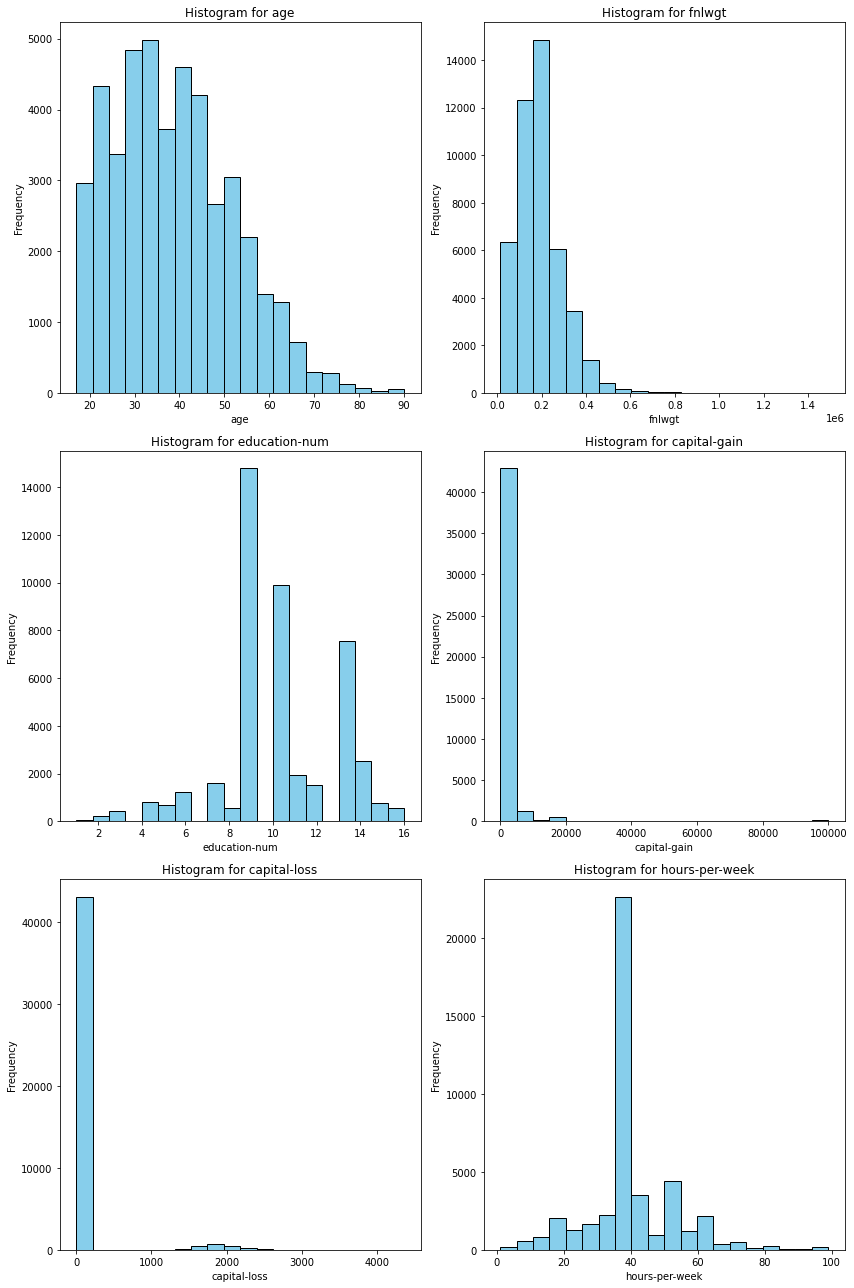

In [34]:
plot_histograms(cleaned_data)